In [63]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [64]:
fraudTrain = pd.read_csv("/home/amirhossein/PycharmProjects/fraud_detection/dataset/fraudTrain.csv")
fraudTest = pd.read_csv("/home/amirhossein/PycharmProjects/fraud_detection/dataset/fraudTest.csv")

In [67]:
fraudTrain

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [59]:
fraudTrain["trans_date_trans_time"] = pd.to_datetime(fraudTrain["trans_date_trans_time"])
fraudTrain["trans_date"] = fraudTrain["trans_date_trans_time"].dt.date
fraudTrain["trans_date"] = pd.to_datetime(fraudTrain["trans_date"])

fraudTrain['year'] = fraudTrain['trans_date'].dt.year
fraudTrain['month'] = fraudTrain['trans_date'].dt.month
fraudTrain['day'] = fraudTrain['trans_date'].dt.day

fraudTest["trans_date_trans_time"] = pd.to_datetime(fraudTest["trans_date_trans_time"])
fraudTest["trans_date"] = fraudTest["trans_date_trans_time"].dt.date
fraudTest["trans_date"] = pd.to_datetime(fraudTest["trans_date"])

fraudTest['year'] = fraudTest['trans_date'].dt.year
fraudTest['month'] = fraudTest['trans_date'].dt.month
fraudTest['day'] = fraudTest['trans_date'].dt.day

In [61]:

fraudTrain = fraudTrain.drop(
    ['zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long', 'trans_num', 'dob', 'first', 'last',
     'trans_date_trans_time', 'trans_date', "Unnamed: 0", 'cc_num', 'street'], axis=1)
fraudTest = fraudTest.drop(
    ['zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long', 'trans_num', 'dob', 'first', 'last',
     'trans_date_trans_time', 'trans_date', "Unnamed: 0", 'cc_num', 'street'], axis=1)

KeyError: "['zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long', 'trans_num', 'dob', 'first', 'last', 'trans_date_trans_time', 'trans_date', 'Unnamed: 0', 'cc_num', 'street'] not found in axis"

In [53]:
fraudTrain['category'].unique().tolist()

['misc_net',
 'grocery_pos',
 'entertainment',
 'gas_transport',
 'misc_pos',
 'grocery_net',
 'shopping_net',
 'shopping_pos',
 'food_dining',
 'personal_care',
 'health_fitness',
 'travel',
 'kids_pets',
 'home']

In [54]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
# persist transforming dictionary
X_train = fraudTrain.drop(['is_fraud'], axis=1)
y_train = fraudTrain[['is_fraud']]
X_test = fraudTest.drop(['is_fraud'], axis=1)
y_test = fraudTest[['is_fraud']]
variables = ['category']
enc.fit(np.array(X_train[variables]))

X_train = X_train.copy()
X_test = X_test.copy()
X_train_enc = enc.transform(np.array(X_train[variables])).toarray()
X_test_enc = enc.transform(np.array(X_test[variables])).toarray()
X_train_enc = pd.DataFrame(X_train_enc,
                           columns=[variables[j] + '_' + str(i) for j in range(len(variables)) for i in
                                    enc.categories_[j]])
X_test_enc = pd.DataFrame(X_test_enc,
                          columns=[variables[j] + '_' + str(i) for j in range(len(variables)) for i in
                                   range(len(enc.categories_[j]))])

X_train = pd.concat([X_train, X_train_enc], axis=1).drop(variables, axis=1)
X_test = pd.concat([X_test, X_test_enc], axis=1).drop(variables, axis=1)

In [55]:
X_train

,merchant,amt,gender,city,state,city_pop,job,year,month,day,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,"fraud_Rippin, Kub and Mann",4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",2019,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"fraud_Heller, Gutmann and Zieme",107.23,F,Orient,WA,149,Special educational needs teacher,2019,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fraud_Lind-Buckridge,220.11,M,Malad City,ID,4154,Nature conservation officer,2019,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"fraud_Kutch, Hermiston and Farrell",45.00,M,Boulder,MT,1939,Patent attorney,2019,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fraud_Keeling-Crist,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,2019,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,15.56,M,Hatch,UT,258,Geoscientist,2020,6,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296671,fraud_Abernathy and Sons,51.70,M,Tuscarora,MD,100,"Production assistant, television",2020,6,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296672,fraud_Stiedemann Ltd,105.93,M,High Rolls Mountain Park,NM,899,Naval architect,2020,6,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296673,"fraud_Reinger, Weissnat and Strosin",74.90,M,Manderson,SD,1126,Volunteer coordinator,2020,6,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

ctf = ColumnTransformer(transformers=[
    ("oe", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
     ['job', 'state', 'city', 'gender', 'merchant'])],
    remainder="passthrough")
X_train = ctf.fit_transform(X_train)
X_test = ctf.fit_transform(X_test)

In [48]:
X_train

array([[370.,  27., 526., ...,   0.,   0.,   0.],
       [428.,  47., 612., ...,   0.,   0.,   0.],
       [307.,  13., 468., ...,   0.,   0.,   0.],
       ...,
       [308.,  32., 346., ...,   0.,   0.,   0.],
       [485.,  41., 471., ...,   0.,   0.,   0.],
       [467.,  26., 782., ...,   0.,   0.,   0.]])

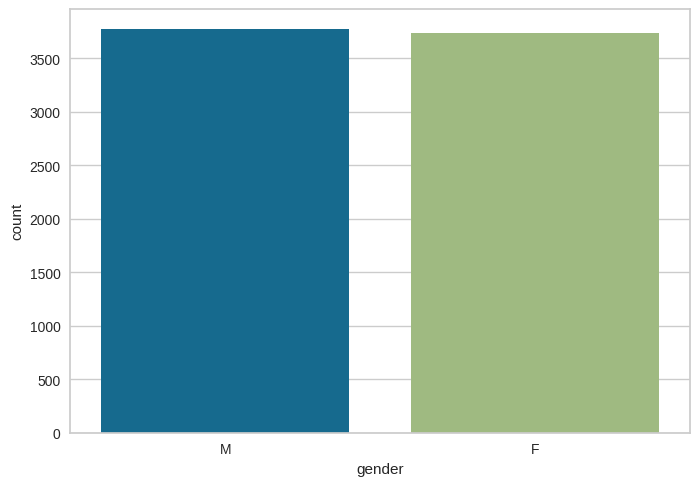

In [21]:
ax = sns.countplot(x="gender", data=fraudTrain[fraudTrain["is_fraud"] == 1])

In [10]:
from pycaret.classification import *

clf = setup(data=pd.concat([X_train, y_train], axis=1), target='is_fraud', fix_imbalance=True)

,Description,Value
0,session_id,8526
1,Target,is_fraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1296675, 19)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9961,0.9509,0.6767,0.6557,0.6657,0.6637,0.6640,39.7730
rf,Random Forest Classifier,0.9960,0.9740,0.6953,0.6454,0.6693,0.6673,0.6678,33.2330
dummy,Dummy Classifier,0.9942,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3690
dt,Decision Tree Classifier,0.9935,0.8387,0.6820,0.4602,0.5493,0.5462,0.5571,2.4130
lightgbm,Light Gradient Boosting Machine,0.9801,0.9855,0.8224,0.2016,0.3238,0.3174,0.4014,2.1150
gbc,Gradient Boosting Classifier,0.9727,0.9754,0.8436,0.1561,0.2634,0.2561,0.3560,40.1900
nb,Naive Bayes,0.9678,0.8290,0.6639,0.1141,0.1944,0.1863,0.2660,0.4540
ada,Ada Boost Classifier,0.9608,0.9480,0.7825,0.1066,0.1875,0.1792,0.2798,8.6440
knn,K Neighbors Classifier,0.9597,0.8935,0.7745,0.1029,0.1817,0.1733,0.2733,2.8380
ridge,Ridge Classifier,0.8281,0.0000,0.7310,0.0242,0.0468,0.0360,0.1117,0.4090


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [25]:
from sklearn.tree import DecisionTreeClassifier

data_train = scaler.fit_transform(X_train)
data_test = scaler.transform(X_test)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, \
    median_absolute_error, classification_report, f1_score, recall_score, precision_score

print("Score the X-train with Y-train is : ", dtc.score(X_train, y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test, y_test))

y_pred = dtc.predict(X_test)

print("Accuracy score ", precision_score(y_test, y_pred))
print("F1 score: ", round(f1_score(y_test, y_pred, average='binary') * 100, 2), "%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.9958828112769224
Accuracy score  0.4717726016581129
F1 score:  51.09 %
